## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1. Make a list of categorical and numerical columns in the data.

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [45]:
df_num = df.select_dtypes(exclude=['object'])
df_num.shape

(244, 3)

In [47]:
df_cat = df.select_dtypes(include=['object'])
df_cat.shape

(244, 4)

### 2. Compute the average bill amount for each day.

In [8]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [60]:
df.groupby('sex')['tip'].sum().round(2)

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [125]:
# Males are more generous in giving tips

### 4. According to the data, were there more customers for dinner or lunch?

In [22]:
df.groupby('time')['size'].count()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [38]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [124]:
# More customers were there for Dinner

### 5. Based on the statistical summary, comment on the variable 'tip'

In [19]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 6. Find the busiest day in terms of the orders?

In [34]:
df.day.mode()

0    Sat
dtype: object

In [127]:
# Busiest day in terms of orders is Saturday

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [49]:
df.total_bill.skew()

1.1332130376158205

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

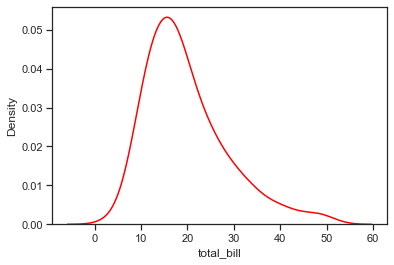

In [43]:
sns.distplot(df['total_bill'],
             hist=False, color='red')

In [126]:
# As per the above observations the total_bill data is postively skewed.

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [56]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<AxesSubplot:>

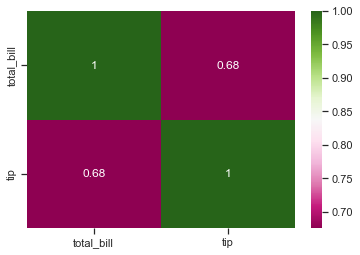

In [58]:
sns.heatmap(df[['total_bill', 'tip']].corr(), annot=True, cmap='PiYG')

In [128]:
# The tip amount is dependent on total_bill and tip increases with the increase in total_bill. 

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [61]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

([<matplotlib.patches.Wedge at 0x213f7eef1c0>,
 [Text(-0.47909423581850497, 0.9901862012800839, 'Male'),
  Text(0.4790942358185044, -0.9901862012800842, 'Female')],
 [Text(-0.2613241286282754, 0.5401015643345912, '64.3%'),
  Text(0.2613241286282751, -0.5401015643345913, '35.7%')])

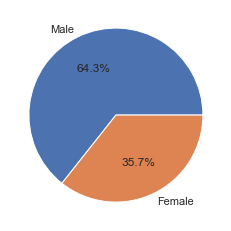

In [63]:
plt.pie(df.sex.value_counts(), autopct = '%.1f%%', labels=['Male', 'Female'])

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

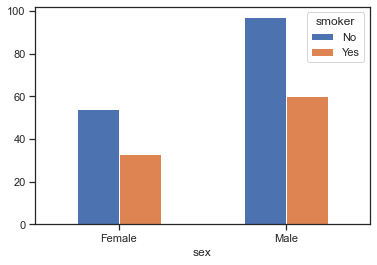

In [68]:
gender=df['sex']
smoker=df['smoker']
crosstb=pd.crosstab(gender,smoker)
barplot = crosstb.plot.bar(rot=0)

### 11. Compute the average tip amount given for different days and display it in the plot.

Text(0, 0.5, 'Average tip')

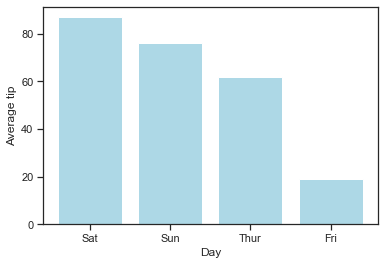

In [75]:
average=df.day.value_counts()
plt.bar(average.index, average.values, color='lightblue')
plt.xlabel('Day')
plt.ylabel('Average tip')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<AxesSubplot:>

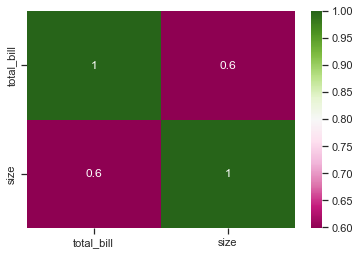

In [73]:
sns.heatmap(df[['total_bill', 'size']].corr(), annot=True, cmap='PiYG')

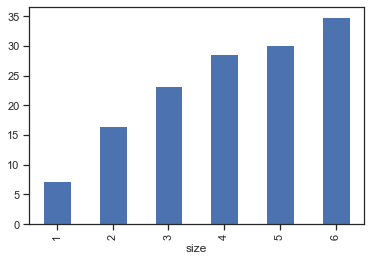

In [130]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

In [ ]:
# total_bill increases with the increase in size.

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

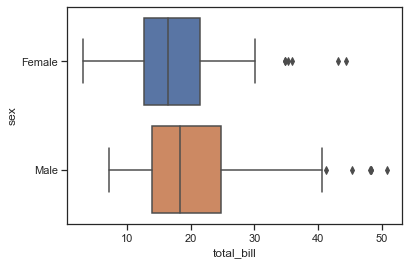

In [70]:
sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [76]:
df_x=df.groupby(['time','day'],as_index=False)['total_bill'].max()
df_x[(df_x['day']=='Sat')|(df_x['day']=='Sun')]

,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


### 15. Compute the percentage of missing values in the dataset.

In [78]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [89]:
len(df[df.duplicated()])

1

In [90]:
df.drop_duplicates()

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,2.832625,0,0,0,1,0,0
1,10.34,1.66,3,2.336020,1,0,0,1,0,0
2,21.01,3.50,3,3.044999,1,0,0,1,0,0
3,23.68,3.31,2,3.164631,1,0,0,1,0,0
4,24.59,3.61,4,3.202340,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,3.368330,1,0,1,0,0,0
240,27.18,2.00,2,3.302481,0,1,1,0,0,0
241,22.67,2.00,2,3.121042,1,1,1,0,0,0
242,17.82,1.75,2,2.880321,1,0,1,0,0,0


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

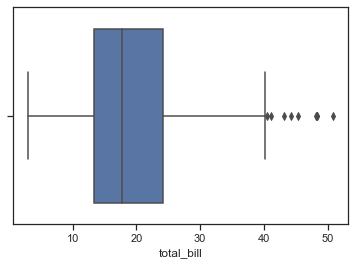

In [83]:
sns.boxplot(df['total_bill'])
plt.show()

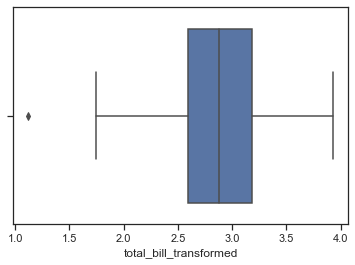

In [84]:
df['total_bill_transformed'] = np.log(df['total_bill'])

sns.boxplot(df['total_bill_transformed'])
plt.show()

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

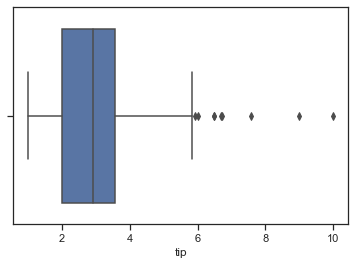

In [85]:
sns.boxplot(df['tip'])
plt.show()

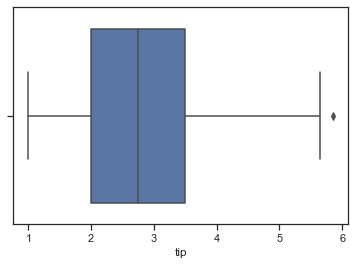

In [86]:
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)

df_out=df.loc[(df['tip']<upper_whisker)&(df['tip']>lower_whisker)]

sns.boxplot(df_out['tip'])
plt.show()

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [87]:
df=pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_transformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
20,17.92,4.08,2,2.885917,1,0,1,0,0,0
125,29.80,4.20,6,3.394508,0,0,0,0,1,1
76,17.92,3.08,2,2.885917,1,1,1,0,0,0
199,13.51,2.00,2,2.603430,1,1,0,0,1,1
222,8.58,1.92,1,2.149434,1,1,0,0,0,1


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [94]:
tb_max = df['total_bill'].max()
print('Max', tb_max)
tb_min = df['total_bill'].min()
print('Min', tb_min)
range = tb_max-tb_min
print('Range before transformation', range)

mm=MinMaxScaler()
df['total_bill_mm']=mm.fit_transform(df[['total_bill']])
tb_mm_max=df['total_bill_mm'].max()
tb_mm_min=df['total_bill_mm'].min()
range_=tb_mm_max-tb_mm_min
print('Range after MinMaxScaler transformation', range_)

Max 50.81
Min 3.07
Range before transformation 47.74
Range after MinMaxScaler transformation 0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [97]:
tips_df = pd.read_csv('tips.csv')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [107]:
# i) Encode the categorical variables.
tips_df = pd.get_dummies(tips_df,drop_first = True)
tips_df.sample(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
190,15.69,1.50,2,1,1,0,1,0,0
234,15.53,3.00,2,1,1,1,0,0,0
131,20.27,2.83,2,0,0,0,0,1,1
179,34.63,3.55,2,1,1,0,1,0,0
14,14.83,3.02,2,0,0,0,1,0,0


In [108]:
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable
X = tips_df[['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Lunch']]
print(X)

y = tips_df['tip']
print(y)

     total_bill  size  sex_Male  smoker_Yes  day_Sat  day_Sun  day_Thur  \
0         16.99     2         0           0        0        1         0   
1         10.34     3         1           0        0        1         0   
2         21.01     3         1           0        0        1         0   
3         23.68     2         1           0        0        1         0   
4         24.59     4         0           0        0        1         0   
..          ...   ...       ...         ...      ...      ...       ...   
239       29.03     3         1           0        1        0         0   
240       27.18     2         0           1        1        0         0   
241       22.67     2         1           1        1        0         0   
242       17.82     2         1           0        1        0         0   
243       18.78     2         0           0        0        0         1   

     time_Lunch  
0             0  
1             0  
2             0  
3             0  
4        

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

mm=MinMaxScaler()

X_train['total_bill'] = mm.fit_transform(X_train[['total_bill']])
X_train['size']=mm.fit_transform(X_train[['size']])
X_test['total_bill'] = mm.fit_transform(X_test[['total_bill']])
X_test['size']=mm.fit_transform(X_test[['size']])

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [119]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [120]:
y_pred = regression_model.predict(X_test)

print('R Squared value is:', r2_score(y_test, y_pred))

R Squared value is: 0.4093770189540388


### Happy Learning:)